# Multi Layer Perceptron Neural Network

## Biological neuron

<img src="img/neuron.png" width="50%">

A neuron, is an electrically excitable cell that receives, processes, and transmits information through electrical and chemical signals. They made of a cell body (soma), dendrites and an axon.

- Dendrite: It receives signals from other neurons
- Soma: It sums all the incoming signals to generate input
- Axon: When the sum reaches a threshold value, sends the signal to the synapse
- Synapses: The point of interconnection of one neuron with other neurons

## Artificial neuron

<img src="img/aneuron.png" width="50%">

Simlulates the structure of a biological neron. As of the simplicity of derivative calculatoin, it uses sum of product of input and coresponding weights. It fires, if the summation reachs to a threshhold. Note that, because of good approximation of fuzzy activations, the function $f$ maybe more complex than simple threshhold function. This functions should be continous and differentiable. For example, tanh, relu and its variants, sigmoid and radial basis functions are some of them. Same as linear regression, by finding set of appropreate weights, we can solve a linear regression problem with this approach

## Artificial neural network

<img src="img/ann.png" width="70%">

An artificial neural network consist of many single neurons connected to each other with a specific structure. Multi layer perceptron (MLP) is a most basic network which neurons are stacked in several layers. Convolutional and recurrent neural networks are other types of ANNs. By training a netwrok we can find optimal weights which leads to a good approximation of desirerd dataset. This process can be devided into three major phases:

- Forward pass
- Backward pass
- Updating weights

### Forward pass

Suppose a $d$-dimensional dataset constains $n$ different samples named $X^{n\times d}$ and $k$-dimensional target values $Y^{n\times k}$. By defining a weight matrix $W_{1}^{d\times h1}$ and using matrix multiplication we have

$z_1 = X \cdot W_1$

which $z_1$ denotes first hidden layer of network. This proccess is equal to apply simple weighted summation for whole dataset and by applying a nonlinear actiovation function we have

$a_1 = \sigma(z_1)$

It's clear that the shape of $a_1$ is $(n \times h1)$. we can repeat this procees. So we have

$z_i = a_{i-1} \cdot W_i$

$a_i = \sigma(z_i)$

for $i=2,\ldots,r$. In the last layer, we have

$\hat{y} = a_r \cdot W_r$

which $\hat{y}$ is the prediction of neural network w.r.t input data $X$ and weights $\{W_i\}_{i=1}^r$.

### loss function

To see the accuracy of the network, we need a measure function to show the cost of prediction. The most known loss functions are mean squared error (MSE) end cross entropy (Xentropy) which are used in regression and classifications tasks, respectively. There are many other loss functions such as mean absolute error, Vapnik's $\epsilon$-insensetive loss function, etc.

### Backward pass

To find optimal weights with mathemathic optimization tools, we need the derivative of loss function w.r.t weights $W_{i,j}^r$. Here we use a well known thechnique known as Backpropagation.

...



### Finding optimal weights

<img src="img/optimizer.png" width="50%">

Function minimization is an essential topic in mathematics. When the function $f(x)$ has quaratic form, there is special optimizers which can rich global minimum efficiently. But for arbitrary nonlinear functions we need to use some parametric iterative algoithms to reach the a minimum point that maybe is a local. Based of the derviate order needed by algorithms the classified into two categories known as first and second order methods. While first order methods need to save gradient vector in memoty, second order optimizers save a matrix of derivatives. Since these methods are very memory intensive for large datasets, some algorithms are developed which approximate that matrix among gradient calculation. The most known algorithms is Limited memory-BFGS (L-BFGS). Because of simple implementation, here we explain gradient descent algorthm which is a very basic first order optimizer.

By starting from an intial point $w_0$ and goal function $L$, we can reach a local minimum with this update rule:

$w_i = w_i - \eta \frac{\partial L}{\partial w_i}$

where $\eta$ called step length or learning rate. Note that, by choosing appropreate value for step length we can reach global minimum. To accelerate the learning process, researchers extened this update rule by adding some terms or changing step length base on some conditions. Momentom, Nestrov, Adagrad, AdaDelta, RMSProp, Adam are some extensions of vanilla gradient descent.

### weight regularization

There are several techniques which are used overcome the overfitting problem. Among them weight decacy and dropout are major methods. In weight decacy, we add a positive function of unknonw weights to the loss function. This leads to small weights and help us to prevent overfitting. because of simplicity here we explin L2-regularization which is named as tikhonov regularization in mathematics.

## Implementation

### preprocessing
we used standard scaling for all inputs. and one hot encoding for classification tasks.

### MLP class

The implementation of our MLP class is defind as a simple class named MLP. 

MLP(hidden_layer, activation, epoch, eta, beta, alpha, mu, batch_size, verbose, task)

where **hidden_layer** is a list where each item defines the number of neurons in the hidden layer. It's obvious that, the length of list denotes number of hidden layers. **activation** is a single class that inherints Activation class and applied to each layer. choises are Sigmoid, Tanh, ReLU and LeakyReLU. **epoch** is number of iterations, **eta**, **beta**, **alpha** and **mu** are step length, initial weight coefficient, regularization coeficient and momentum parameter, respectively. **batch_size** denotes the number of batch passed to batch gradient descent, verbose is an optional argement for this class where used to show the loss of i-th iteration. task parameter must be one of **regression** or **classification**. Based on task, this class encodes output values and also chooses activation function of last layer automatically.

## Hyperparameter tuning

To find optimal architecture of network, grid seach is a simple and efficient way. By passing a set of different possible choises for a problem, the following class runs and saves all possible architectures and their coresponding loss history.

MLPGridSearch(task, hidden_layers, activations, batch_sizes, epochs, mus, betas, etas, alphas, filename)

Also, To speedup the grid calculation, we implemented **parallelization** techniques for multi-core processors.

# Datasets

In [3]:
%load_ext autoreload
%autoreload 2
from result_analyzer import *
from nn.mlp.activations import *

In [4]:
%%html
<style>
table.dataframe {
    margin: 10px auto !important;
    border: 1px solid #cfcfcf;
    width: 100%;
}
table.dataframe * {
    text-align:center !important;
}
</style>

## Iris dataset

In [5]:
hidden_layers = [(5, 5, 5, 5), (10, 10, 5), (15, 15), (20, 15, 10)]
activations = [Tanh(), LeakyReLu(.1), ReLu()]
batch_sizes = [16, 32, 64]
epochs = [1000]
mus = [0.85, 0.9, 0.95]
betas = [.1, .2]
etas = [.01, .1, 0.001]
alphas = [.001, 0.01, .1]

we ran 1944 different models in about 40 min 

,hidden_layer,activation,epoch,eta,beta,alpha,mu,batch_size,test_score,loss
0,"(5, 5, 5, 5)",ReLu,1000,0.1,0.2,0.001,0.95,16,1.000000,0.07
1,"(5, 5, 5, 5)",ReLu,1000,0.1,0.2,0.001,0.95,32,1.000000,0.12
2,"(10, 10, 5)",ReLu,1000,0.1,0.2,0.001,0.85,16,1.000000,0.14
3,"(5, 5, 5, 5)",LeakyReLu(0.1),1000,0.1,0.2,0.001,0.85,16,1.000000,0.15
4,"(10, 10, 5)",Tanh,1000,0.1,0.1,0.010,0.95,32,0.973684,0.00
5,"(20, 15, 10)",Tanh,1000,0.1,0.2,0.010,0.90,16,0.973684,0.02


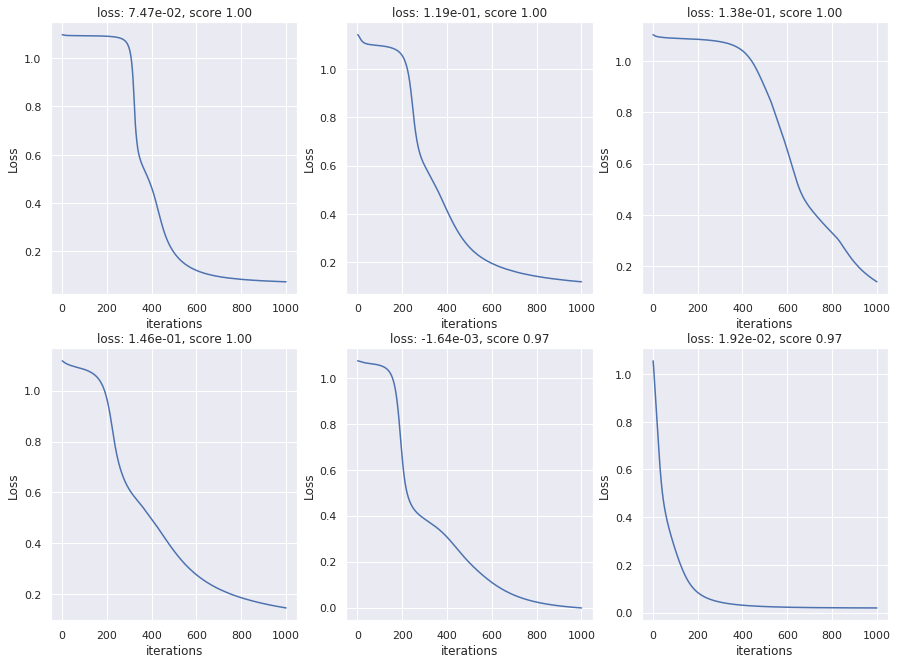

In [15]:
iris_csv_result = '../../results/iris.csv'
best_models = analyze(iris_csv_result)
best_models

In this example we saw that deeper network have better approximation ability versus networks with few hidden layer where each layer has a lot of neurons.

## Satlog dataset

we tried 972 different models in about 6:30 min

In [4]:
hidden_layers = [(32, 16, 8), (10, 10), (12, 6)]
activations = [Tanh(), Sigmoid(), LeakyReLu(.03)]
batch_sizes = [64, 256, 512]
epochs = [1000]
mus = [0.95, .9]
betas = [.1, .3]
etas = [.01, 0.1, .3]
alphas = [.001, 0.01, 0.1]

,hidden_layer,activation,epoch,eta,beta,alpha,mu,batch_size,test_score,loss
0,"(32, 16, 8)",Tanh,1000,0.3,0.3,0.001,0.95,64,0.8770,0.29
1,"(32, 16, 8)",LeakyReLu(0.03),1000,0.3,0.3,0.001,0.95,64,0.8755,0.28
2,"(32, 16, 8)",LeakyReLu(0.03),1000,0.3,0.3,0.010,0.95,64,0.8640,0.43
3,"(32, 16, 8)",LeakyReLu(0.03),1000,0.3,0.3,0.001,0.90,64,0.8635,0.30
4,"(32, 16, 8)",LeakyReLu(0.03),1000,0.3,0.3,0.010,0.90,64,0.8605,0.57
5,"(32, 16, 8)",LeakyReLu(0.03),1000,0.3,0.1,0.001,0.95,64,0.8575,0.34


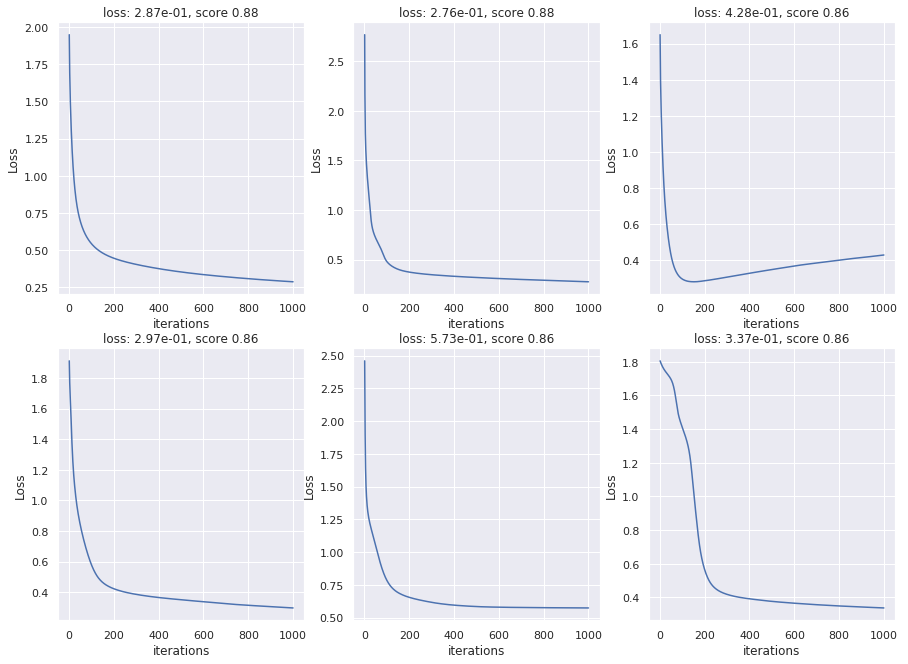

In [16]:
iris_csv_result = '../../results/satlog.csv'
best_models = analyze(iris_csv_result)
best_models

we found that sigmoid and tanh are not good choices, generally.

Again we used this grid to find optimal model.

In [5]:
hidden_layers = [(32, 16, 8)]
activations = [ReLu(), LeakyReLu(.03), LeakyReLu(.1)]
batch_sizes = [32, 64]
epochs = [3000]
mus = [0.95]
betas = [.3, .5]
etas = [.3,.4]
alphas = [.001,0.0001]

,hidden_layer,activation,epoch,eta,beta,alpha,mu,batch_size,test_score,loss
0,"(32, 16, 8)",ReLu,3000,0.3,0.3,0.0010,0.95,32,0.9035,0.14
1,"(32, 16, 8)",ReLu,3000,0.4,0.3,0.0010,0.95,64,0.9010,0.16
2,"(32, 16, 8)",ReLu,3000,0.3,0.3,0.0001,0.95,64,0.8995,0.16
3,"(32, 16, 8)",LeakyReLu(0.1),3000,0.4,0.5,0.0010,0.95,32,0.8985,0.12
4,"(32, 16, 8)",LeakyReLu(0.1),3000,0.3,0.3,0.0010,0.95,32,0.8985,0.14
5,"(32, 16, 8)",LeakyReLu(0.03),3000,0.3,0.3,0.0010,0.95,32,0.8975,0.14


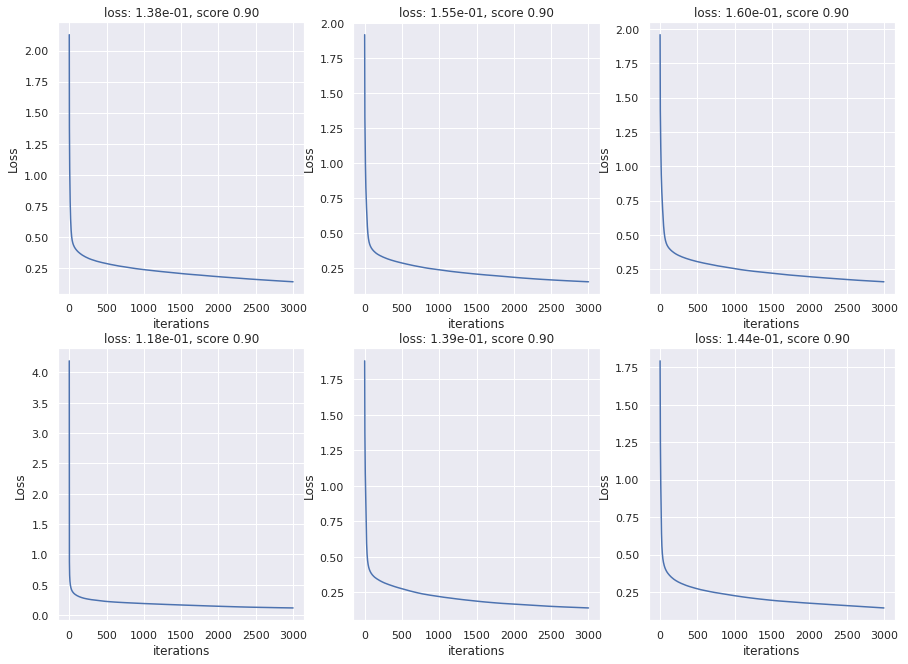

In [9]:
iris_csv_result = '../../results/satlog-1.csv'
best_models = analyze(iris_csv_result)
best_models

the best architechture achived the test score 90.35%. To compare the results with well known packages, we tested this problem with scikit-learn MLPClassifier class. it's best result is 90.6% based on my experiments.

## MNIST dataset

we tried 360 different models.

In [6]:
hidden_layers = [(10, 10), (20, 10), (30, 20, 10), (10, 10, 10, 10), (64,)]
activations = [Tanh(), LeakyReLu(0.02), ReLu()]
batch_sizes = [256, 512]
epochs = [100]
mus = [0.95, .9]
betas = [.2]
etas = [.001, .1, .25]
alphas = [.001, .1]

,hidden_layer,activation,epoch,eta,beta,alpha,mu,batch_size,test_score,loss
0,"(64,)",LeakyReLu(0.02),100,0.25,0.2,0.100,0.95,256,0.7094,5.83
1,"(64,)",ReLu,100,0.25,0.2,0.100,0.95,256,0.7072,1.67
2,"(64,)",LeakyReLu(0.02),100,0.25,0.2,0.001,0.95,256,0.7065,0.99
3,"(64,)",ReLu,100,0.25,0.2,0.001,0.95,256,0.6930,1.20
4,"(64,)",ReLu,100,0.25,0.2,0.001,0.95,512,0.6135,1.71
5,"(64,)",LeakyReLu(0.02),100,0.25,0.2,0.100,0.90,256,0.5945,4.57
6,"(64,)",ReLu,100,0.25,0.2,0.001,0.90,256,0.5923,1.89
7,"(64,)",ReLu,100,0.25,0.2,0.100,0.90,256,0.5896,1.21
8,"(64,)",LeakyReLu(0.02),100,0.25,0.2,0.001,0.95,512,0.5887,1.77
9,"(64,)",LeakyReLu(0.02),100,0.25,0.2,0.100,0.95,512,0.5868,1.89


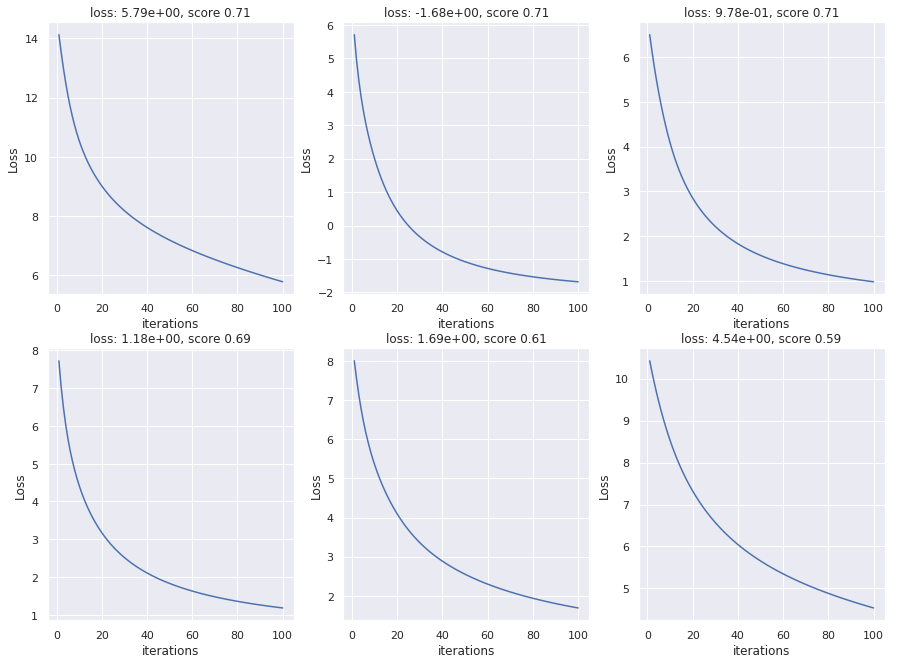

In [14]:
iris_csv_result = '../../results/mnist/mnist.csv'
best_models = analyze(iris_csv_result, n=10)
best_models

In this examlpe we saw that, although increasing number of hidden layers leads to more complex network with ability to solve harder problems, when number of input dimensions are big, the number of neoruns in hidden layers play very important role.

The first model has the best test score but it's loss value is big. Second model surprisingly has negative loss which probably caused by floating point overflow. Therefore we select third model for next grid search parameters.

## Fashion mnist dataset

In [17]:
hidden_layers = [(10, 10), (20, 10), (30, 20, 10), (10, 10, 10, 10), (64,)]
activations = [Tanh(), LeakyReLu(0.02), ReLu()]
batch_sizes = [256, 512]
epochs = [100]
mus = [0.95, .9]
betas = [.2]
etas = [.001, .1, .25]
alphas = [.001, .1]

,hidden_layer,activation,epoch,eta,beta,alpha,mu,batch_size,test_score,loss
0,"(64,)",ReLu,100,0.25,0.2,0.100,0.95,256,0.6946,1.74
1,"(64,)",LeakyReLu(0.02),100,0.25,0.2,0.100,0.95,256,0.6946,6.38
2,"(64,)",LeakyReLu(0.02),100,0.25,0.2,0.001,0.95,256,0.6926,0.95
3,"(64,)",ReLu,100,0.25,0.2,0.001,0.95,256,0.6851,1.05
4,"(64,)",LeakyReLu(0.02),100,0.25,0.2,0.100,0.95,512,0.6676,1.61
5,"(64,)",ReLu,100,0.25,0.2,0.100,0.90,256,0.6470,1.09
6,"(64,)",LeakyReLu(0.02),100,0.10,0.2,0.100,0.95,256,0.6464,1.80
7,"(64,)",ReLu,100,0.25,0.2,0.001,0.90,256,0.6458,1.49
8,"(64,)",ReLu,100,0.25,0.2,0.100,0.95,512,0.6372,1.94
9,"(64,)",LeakyReLu(0.02),100,0.25,0.2,0.001,0.90,256,0.6336,1.50


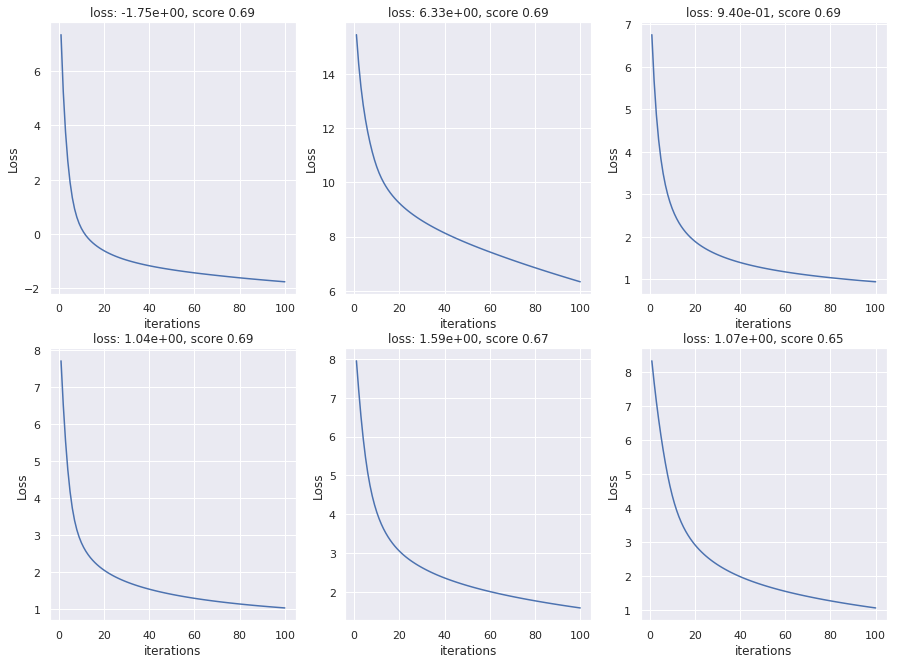

In [19]:
iris_csv_result = '../../results/fashion_mnist/fashion.csv'
best_models = analyze(iris_csv_result, n=10)
best_models